# Program for fraction of non-fluorescent colonies 

This program relate to FigureS2B.

### import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

### Matplotlib setting

In [2]:
plt.rcParams['text.usetex'] = True 
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.rcParams["font.size"] = 14

### import experimental data and calculate the fraction and its errorbars

In [3]:
path = './deletion_in_batch_culture_data'
path_list = glob.glob(os.path.join(path, '**.csv'), recursive = True)

Result_all = pd.concat([pd.read_csv(i) for i in path_list]).reset_index(drop = True)
Result_all = Result_all.groupby('BL_time', as_index = False).sum()
Result_all.sort_values('Time',inplace = True)
Result_all['Time'] = Result_all['Time']/len(path_list) ### To adjust the time because 'Time' data increase the groubby.sum() 
Result_all['prob'] = Result_all['FL-']/Result_all['Total']
Result_all['err'] = 2*np.sqrt((Result_all['prob']*(1-Result_all['prob']))/Result_all['Total'])

### plot and save figure

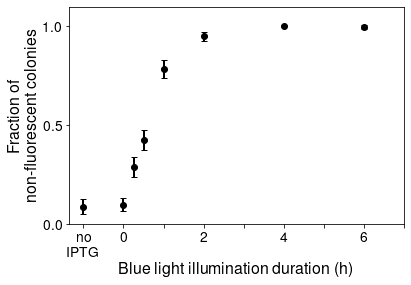

In [4]:
fig, ax = plt.subplots(ncols = 1, nrows = 1)
Result_all.plot(x = 'Time', y = 'prob', yerr = 'err', ax = ax, elinewidth = 2, linewidth = 0,marker = 'o', capsize = 3,legend = None, color = 'black')
ax.set_ylim(0,1.1)
ax.set_xlabel('Blue light illumination duration (h)', fontsize = 16)
ax.set_ylabel('Fraction of \nnon-fluorescent colonies', fontsize= 16)
ax.set_xticks([-1,0,1,2,3,4,5,6,7,])
ax.set_xticklabels(['no\nIPTG',0,'',2,'',4,'',6,'',], fontsize = 14)
ax.set_yticks([0,0.5,1.0])
ax.set_yticklabels(['0.0','0.5','1.0'], fontsize = 14)
plt.show()
#save_path = './FigureS2B.pdf'
#plt.savefig(figure_path + '/BL_deletion_fraction.pdf', bbox_inches = 'tight', transparent = True)